# Monte Carlo Ferromagnet
Christina C Lee
Physics Prerequisites: Statistics Mechanics/ Phase Transitions
Numerics Prerequisite: Monte Carlo Markov Chain

## The physics
What process turns liquid water into a solid?  As objects cool down, they transition from a regime where the desire to maximize entropy dominates to a regime where the desire to minimize energy dominates.   In transitions like liquid-solid, the energy arises from atom-atom long range forces, and therefore is a difficult problem to solve.

Instead of looking at the liquid-solid problem to understand phase transitions, we will look at a material (like magnetite) going from magnetized to non-magnetized (paramagnetic). In our approximation of the problem, the atoms exist at fixed positions on a lattice, and interact with their neighbor according to the following Hamiltonian,
\begin{equation}
    {\cal H} = -J \sum_{<i,j>} S^z_i S_j^z
\end{equation}
, which is basically just the energy.  This <i>Ising</i> Model has nearest neighbors interacting, and each solely points in the $\pm z$ direction.  

At a given temperature $T$, and thus inverse temperature $\beta=1/T$ ($k_b=1$), the occupancy of a given configuration $c_i$ follows the Maxwell-Boltzmann Distribution,
\begin{equation}
P(c_i)=\frac{\mathrm{e}^{-\beta E(c_i)}}{\sum\limits_j \mathrm{e}^{-\beta E(c_j)}}
\end{equation}


## The Numerics 

![A low temperature search of a couch store](Ferromagnet/couch.JPG)
Here I am performing a low temperature search of a couch store.  I found a minimum, and even though I got stuck there, I thoroughly got to know what that minimum had to offer.

![A high temperature search](Ferromagnet/mountain.jpg)
In this picture, on the other hand, I'm performing a high temperature search of the Alexander Hills, Death Valley, California in pursuit of Neoproterzoic carbonates and dimictites.  I needed to be able to explore a lot more of the environment.  


In [1]:
using PyPlot;
push!(LOAD_PATH,".")
using Lattices;

In [42]:
l=50;
beta=1.1;
J=1;
t=100000;

Instead of going into calculating all the lattice parameters again, we will use a class I define in the file Lattices.jl .  This class contains

Lattice Types
* Chain
* Square
* Honeycomb

and once a lattice is created, it contains

Members of Type
* name  , a string
* l , length in number of unit cells
* dim, dimension of lattice
* a, array containing the basis vectors by which positions are generated
* unit. array of positions inside a single unit
* N , number of total sites
* X, array of positions
* nnei, number of nearest neighbors
* neigh, Array of nearest neighbors [i][j], where i is site and j is 1:nnei

Today, I will just look at the square lattice, since that indicates much of the standard phase transition properties.  Some of the lattices I have shown (kagome, triangular, ...) are special frustrated lattices, and thus will behave very wierdly in this situation.

In [43]:
sq=MakeLattice("Square",l);
S=ones(Int8,l,l);  #Our spins
dt=1/(sq.N);

In [44]:
# The energy contribution of just one site
function dE(i::Int)
    Eii=0;
    for j in 1:sq.nnei
        Eii+=S[sq.neigh[i,j]];
    end
    Eii*=-J*S[i];  # we are computing J sz_i sz_j for one i
    return Eii;
end
# The energy of the entire lattice
function E()
    Evar=0;
    for k in 1:sq.N
        Evar+=.5*dE(k);
    end
    return Evar;
end
# The magnetization of the entire lattice
function M()
    Mvar=0;
    for k in 1:sq.N
        Mvar+=S[k];
    end
    return Mvar;
end

M (generic function with 1 method)

We will be wanting to measure our magnetization and energy throughout, but only once the state has become thoroughly decorellated. 

The correlation time is measured by:
\begin{equation}
\langle S(0) S(t)\rangle
\end{equation}


In [45]:
nskip=10;   # don't measure every sweep= better decorrelation
t=500;
nmeas=Int64(t/nskip); # how many times we will measure
Ma=Array{Int32}(nmeas); # our magnetization measurements
Ea=Array{Int32}(nmeas); # our energy measurements
Correl=Array{Float64}(nmeas); # The Correlation function
"done"

"done"

In [48]:
beta=.4

0.4

In [49]:
tm=1; #Our measurement time step
pygui(true)
S0=copy(S);  ## To test correlation with
for ti in 1:t
    for j in 1:sq.N
        i = rand(1:sq.N); #Choosing a random site
        de=dE(i);
        if(de>0 || rand()<exp(2*beta*de) ) 
            S[i]=-S[i]; #Switch the sign
        end
    end
    if isapprox(mod(ti,nskip),0)
        Ma[tm]=M();
        #Correl[tm]=sum(S.*S0)/sq.N-sum(S)*sum(S0)/(sq.N^2);
        tm+=1;
        
        #Uncomment to get a nice color plot of the lattice
        pcolor(S,cmap="winter")
        temp=round(M()/sq.N,3)
        title("t: $ti  M: $temp ")
        draw()
        sleep(.5)
        #nm=dec(ti,4)
        #savefig("Magnetimages/picl30_b2_$nm.png")
    end
end
Mave=mean(Ma/sq.N);
Mstd=std(Ma/sq.N);
Mave, Mstd

(0.2232,0.15340148736740009)

In [ ]:
pygui(false)
plot(Ctest[1:50,1],linestyle=":")
plot(Ctest[1:50,2],linestyle=":")
plot(Ctest[1:50,3],linestyle=":")
plot(Ctest[1:50,4],linestyle=":")
plot(Ctest[1:50,5],linestyle=":")
plot(Cmean[1:50],color="black")

#annotate("Average of 5 runs",
#xy=[25;0],
#xytext=[28;-.2],
#xycoords="data",
#arrowprops=Dict("facecolor"=>"black"))

#annotate("Uncorrelated at t=6",
#xy=[6;-.02],
#xytext=[1;-.2],
#xycoords="data",
#arrowprops=Dict("facecolor"=>"black"))

title("Correlation time at beta=0.3")
ylabel("Autocorrelation")
xlabel("Time steps ti")

In [ ]:
pygui(true)
pcolor(reshape(S,10,10),cmap="winter")

In [ ]:
pygui(false)
plot(Ma)

In [ ]:
pygui(false)
plt[:hist](Ma);

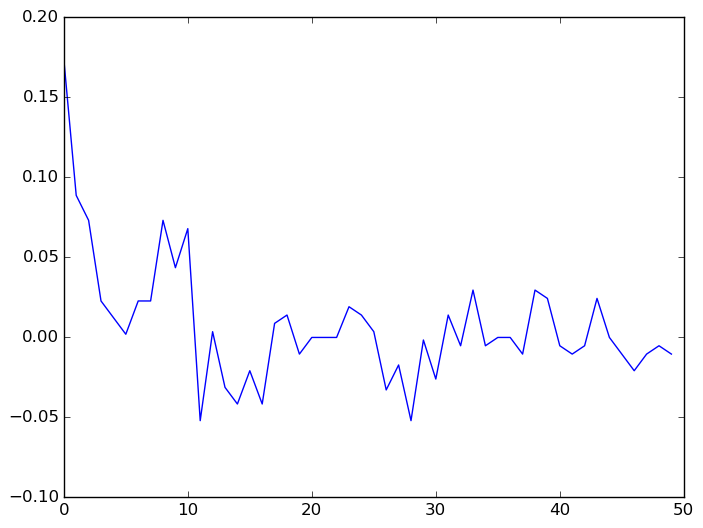

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff42ab9b310>

In [71]:
pygui(false)
plot(Correl[1:50])

## Example Results
So here are some example results I got.

![Correlation at beta=0.3](Images/MCMC/corb0_3.png)